## Tries

A tree based data structure (n-ary), used to store collections of strings. where each node stores a dictionary of characters. Used for prefix-based searches 

Used when you have thousands of strings. ,

Why not hash tables ? Because hash tables cannot do prefix based searches well

The 4 operations in a trie are insertion, deletion, full search and prefix-based search
If we use a BST for searching for a string, it will take m * O(h) where m is the length of the string to search for, and log n is the number of h is the height of the BST

With a trie, you can do a search in O(m)

Every node has 2 attributes in a trie - a dictionary of all characters at that level, and a flag for end_of_word = True/False, True if the node represents the end of a string, false if somewhere in between

You have a root in a trie - a root contains a dictionary of all characters which are the first character of the strings stored in a trie

For example, if you store apple and banana in a trie,
the root is a node with dictionary = {'a', 'b'}

If ab and abc are the strings in the trie, a will be root, b will be second level, and there a branching will happen, one going to an end_of_word token, and the other going for c and end_of_word

Here's a trie with 5 strings inserted : 

abc
abcd
abgl
cdf
lmn


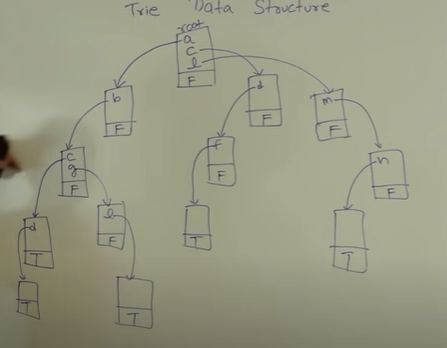



Insertion is O(m) - when inserting a string, go character by character, start at root, if first character is there at root dict, go to node at map_dict[first_character], see if second character is there, if not insert it and so on. Once insertion is complete, add end_of_word to final node

Full word search is O(m). Start with first character at root, if present go to second character as pointed by map_dict and so on till you traverse all characters. If you finally get end_of_word=True, return True, otherwise false at any point

Prefix search is O(m) - start with first character at root, go down - if you are able to find all characters, return True, else False

Deletion is a bit tricky. 

If you want to delete abc in above example - 
Since abcd also exists, you can't just delete c node
Instead, mark the node which goes from d - end_of_word from True to False

If you want to delete abgl, start with root go to l. Keep deleting from bottom as long as no other children exist

## Implementing a trie with search, starts with and insert
https://leetcode.com/problems/implement-trie-prefix-tree/

In [1]:
class TrieNode:

    def __init__(self, end_of_word=False, map_dict=None):
        if map_dict is None:
            self.map_dict = {}
        else:
            self.map_dict = map_dict
        self.end_of_word = False

class Trie:

    def __init__(self):

        self.node = TrieNode()

        

    def insert(self, word: str) -> None:
        node = self.node
        for char in word:
            if char in node.map_dict:
                node = node.map_dict[char] 
            else:
                temp = TrieNode()
                node.map_dict[char] = TrieNode()
                node = node.map_dict[char]

            
        node.end_of_word = True

        

    def search(self, word: str) -> bool:
        node = self.node
        for char in word:
            if char not in node.map_dict:
                return False
            node = node.map_dict[char]
        if node.end_of_word==True:
            return True
        else:
            return False
        

    def startsWith(self, prefix: str) -> bool:
        node = self.node
        for char in prefix:
            if char not in node.map_dict:
                return False
            node = node.map_dict[char]
        return True
        


# Your Trie object will be instantiated and called as such:
# obj = Trie()
# obj.insert(word)
# param_2 = obj.search(word)
# param_3 = obj.startsWith(prefix)


Design Add and Search Words Data Structure
https://leetcode.com/problems/design-add-and-search-words-data-structure/

In [21]:
import string

class TrieNode:
    
    def __init__(self, map_dict=None, end_of_word=False):
        
        if map_dict is None:
            self.map_dict = {}
        else:
            self.map_dict = map_dict
            
        self.end_of_word = end_of_word
        

class WordDictionary:

    def __init__(self):
        
        self.node = TrieNode()
        self.dot_mapping_list = list(string.ascii_lowercase[0:26])
        

    def addWord(self, word: str) -> None:
        
        node = self.node
        for char in word:
            if char not in node.map_dict.keys():
                node.map_dict[char] = TrieNode()
            
            node = node.map_dict[char]
        node.end_of_word = True
            
        
    
    
    def search(self, word: str) -> bool:
        
        output = [False]
        def dfs(i, node):
            if i==len(word):
                if node.end_of_word==True:
                    output[0] = True
                    return
                else:
                    return
            
            char = word[i]
            if char != ".":
                if char not in node.map_dict.keys():
                    return
                else:
                    node = node.map_dict[char]
                    dfs(i+1, node )
                    
            else:
                for ch in self.dot_mapping_list:
                    if ch in node.map_dict.keys():
                        new_node = node.map_dict[ch]
                        dfs(i+1, new_node)
                return ## No character matched
        dfs(0, self.node)
        return output[0]
                        
                        
                
            
            

                        
            
        

In [22]:
a = WordDictionary()
a.addWord('apple')

In [26]:
a.search('a..lf')

False

## References

1) https://www.youtube.com/watch?v=AXjmTQ8LEoI

In [8]:
import string
list(string.ascii_lowercase[0:26])

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']